In [4]:
from tools import *
%matplotlib inline

# Algorithme du perceptron

Ce TD est consacré à l'étude du perceptron. 
Cet algorithme a une longue histoire et est la base des réseaux de neurones. Il peut être vu comme une descente du gradient sur un coût particulier, le **hinge loss**, même si historiquement son inspiration est de nature biologique.

## Principe

On se place dans le cadre de la classification binaire : on considère deux labels, $Y=\{-1/+1\}$, et un ensemble de données $\{(x^i,y^i)\}\in X\times Y \subset \mathbb{R}^d\times Y$. 
On cherche une fonction $f$ qui permette de **généraliser** l'ensemble des données et de faire le moins d'erreurs sur l'ensemble disponible. Nous nous plaçons toujours dans le cadre linéaire - $f$ est en fait paramétrisée par un vecteur $w$ dit de poids, $f_w(x)= <w,x> +w_0= \sum_i w_i x_i+w_0$ , et la classification est faite  en considérant le signe de $f_w(x)$ : le label prédit par $f$ pour $x$ est $sign(f_w(x))$.

Le coût qui nous intéresse en classification est l'erreur $0/1$, qui compte une erreur lorsque le label prédit est différent de l'attendu : $l(f_w(x),y)=\mathbf{1}_{sign(f_w(x))\not = y}$, l'objectif étant de trouver la fonction - le paramètrage $w$ - qui minimise ce coût sur l'ensemble des données (la fonction qui fait le moins d'erreurs, cf minimisation du risque empirique). 
Cependant ce coût est difficile à optimiser (pourquoi ?). 
Afin de pouvoir optimiser le paramètre $w$, on étudie un coût appelé dans le cadre général *hinge loss* : $l_\alpha(f_w(x),y)= max(0,\alpha-y f_w(x))$.
Dans le cas du perceptron, on prend $\alpha = 0$.

L'algorithme du perceptron est le suivant :

- Choisir $w_0$ au hasard
- Tant que non convergence
    * mise à jour de $w_t$ :
      $w_{t+1} = w_t +\epsilon \sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0} $



1. En fonction de $sign(f_w(x))y$, quand une mise à jour est-elle vraiment effectuée ? Quelle signification pour l'erreur sur cet exemple $x$ ? Quel rapport entre $\nabla_w l_0(f_w(x),y)$ et la mise à jour de $w$ ? Montrez que cet algorithme revient à un algorithme de descente de gradient.

La mise à jour est effectuée lorsque $sign(f_w(x))\not = y$. Or y=-1 ou 1 ie positif ou negatif. La mise à jour est effectué uniquement losque $f_w(x)$ et y sont de signes contraires ie lorsque $sign(f_w(x)y)<0$. L'erreur est donc $l(f_w(x),y)=\mathbf{1}_{sign(f_w(x)y)<0}$ .  cf notes manuelles

2. Complétez le code ci-dessous : codez une fonction `hinge(w,data,y,alpha=0)` qui renvoie l'erreur hinge moyenne pour un vecteur de poids `w`, une matrice d'exemples `data`, un vecteur de label `y` et un paramètre $\alpha$. Codez une fonction `hinge_grad(w,data,y,alpha=0)` qui renvoie le gradient moyen pour les mêmes paramètres.

### Conventions pour toutes les séances
Nous considérerons toujours :

* une matrice `data` d'exemples de taille `n` lignes et `d` colonnes, représentant `n` exemples décrient en `d` dimensions;
* un vecteur `y` de labels de taille `n` correspondant aux labels des exemples;
* un vecteur de poids `w` de taille `(d,)`.

Pensez à :

* utiliser `array.reshape((n,d))` qui permet de transformer les tailles des matrices. Très utile pour transformer un vecteur en matrice pour réaliser des opérations matricielles;
* la multiplication éléments par éléments en numpy : `*`, la multiplication matricielle : `a.dot(b)`;
* la fonction `np.maximum(x,b)` qui renvoie la matrice maximum entre un scalaire `x` et la matrice `b` élément par élément (différente de la fonction `np.max`);
* vérifiez vos calculs sur un exemple dans la console.

 

In [5]:
def hinge(w,data,y,alpha=0):
    if len(data.shape)==1:
        data=data.reshape(1,data.shape[0]) ##vector to lign vector
    if len(w.shape)==1:
        w=w.reshape(1,w.shape[0])
    if len(y.shape)==1:
        y=y.reshape(y.shape[0],1)
    return np.mean(np.maximum(0,-y*(data.dot(np.transpose(w)))))

def hinge_grad(w,data,y,alpha=0):
    if len(data.shape)==1:
        data=data.reshape(1,data.shape[0])
    if len(w.shape)==1:
        w=w.reshape(1,w.shape[0])
    if len(y.shape)==1:
        y=y.reshape(y.shape[0],1)
    return np.mean(-(y*data)*((-y*data.dot(np.transpose(w))>0)),axis=0)
    

w = np.random.random((1,3))
data = np.random.random((100,3))
y = np.random.randint(0,2,size = (100,1))*2-1

#### doit retourner un scalaire
print (hinge(w,data,y), hinge(w,data[0],y[0]), hinge(w,data[0,:],y[0]))
### doit retourner un vecteur de taille (w.shape[1],)
print (hinge_grad(w,data,y),hinge_grad(w,data[0],y[0]),hinge_grad(w,data[0,:],y[0]))

0.625087792275 0.959965978988 0.959965978988
[ 0.28017361  0.2890192   0.26184015] [ 0.1393834   0.17803284  0.84254459] [ 0.1393834   0.17803284  0.84254459]



Le code suivant est un squelette de classe pour le perceptron :

- le paramètre `eps` représente le pas d'apprentissage $\epsilon$;
- le paramètre `max_iter` le nombre d'itérations;
- la méthode `fit(data,y)` permet d'entraîner le perceptron sur les données en paramètres;
- la méthode `predict(data)` doit renvoyer les labels prédits sur les données;
- la méthode `score(data,y)` doit renvoyer le pourcentage de bonnes classifications en prédiction pour les données `data` par rapport aux labels  `y`;


Complétez le code.

In [6]:
class Perceptron:
    def __init__(self,max_iter = 1000,eps=1e-3):
        self.max_iter = max_iter
        self.eps = eps

    def fit(self,data,y):
        self.w = np.random.random((1,data.shape[1]))
        self.hist_w  = np.zeros((self.max_iter,data.shape[1]))
        self.hist_f = np.zeros((self.max_iter,1))
        self.i=0
        while self.i < self.max_iter :
            self.w = self.w -self.eps*hinge_grad(self.w,data,y)
            self.hist_w[self.i]=self.w
            self.hist_f[self.i]=hinge(self.w,data,y)
            if self.i % 100==0: print (self.i,self.hist_f[self.i])
            self.i+=1

    def predict(self,data):
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        return np.sign(data.dot(np.transpose(self.w)))
    
    def score(self,data,y):
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        if len(y.shape)==1:
            y=y.reshape(y.shape[0],1)
        return np.mean((y*data.dot(np.transpose(self.w))>0))
        

## Expérimentations  sur des données artificielles 2d
Le code suivant vous permet de générer 3 types de données artificielles 2d (paramètre `data_type`). La fonction `plot_data` permet de tracer un graphe des données et `plot_frontiere` la frontière de décision pour une fonction de décision passée en paramètre.

In [7]:
def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,eps=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param eps: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
        #melange de 2 gaussiennes
        xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),int(nbex/2))
        xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),int(nbex/2))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(int(nbex/2)),-np.ones(int(nbex/2))))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),int(nbex/4)),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),int(nbex/4))))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),int(nbex/4)),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),int(nbex/4))))     
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(int(nbex/2)),-np.ones(int(nbex/2))))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,eps,nbex)
    data[:,1]+=np.random.normal(0,eps,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y

def plot_data(data,labels=None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    cols,marks = ["red", "green", "blue", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1],marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])



def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y


def plot_frontiere(data,f,step=20):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x,y=make_grid(data=data,step=step)
    plt.contourf(x,y,f(grid).reshape(x.shape),colors=('gray','blue'),levels=[-1,0,1])


Le code suivant permet d'engendrer des données, apprendre un perceptron et tracer une la frontiere de decision (la frontière est tracée en discrétisant l'espace par une grille et en calculant pour chaque point de la grille le label prédit).

0 [ 0.]
100 [ 0.]
200 [ 0.]
300 [ 0.]
400 [ 0.]
500 [ 0.]
600 [ 0.]
700 [ 0.]
800 [ 0.]
900 [ 0.]
1.0


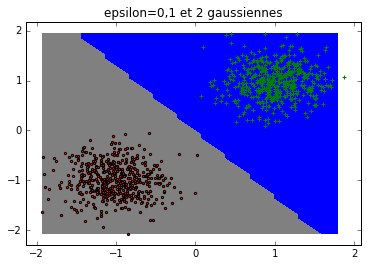

0 [ 0.00075485]
100 [ 0.0007143]
200 [ 0.00067436]
300 [ 0.00063803]
400 [ 0.00060222]
500 [ 0.00056642]
600 [ 0.0005318]
700 [ 0.00050056]
800 [ 0.00046947]
900 [ 0.00043819]
0.993


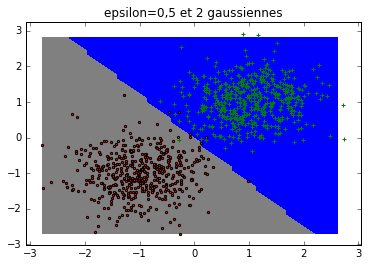

In [9]:
### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et 2 gaussiennes")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.5)
p = Perceptron(eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,5 et 2 gaussiennes")
plt.show()


Dans le cas où espilon est égal à 0,1 avec deux gausiennes, les données sont parfaitement separables.
Dans le cas où espilon est égal à 0,5 avec deux gausiennes, les données sont quasiment entierement séparables (993/1000).

0 [ 0.44906732]
100 [ 0.0173629]
200 [ 0.01045376]
300 [ 0.00379689]
400 [ 0.0111399]
500 [ 0.01782965]
600 [ 0.02431674]
700 [ 0.01009634]
800 [ 0.00152869]
900 [ 0.00128706]
0.5


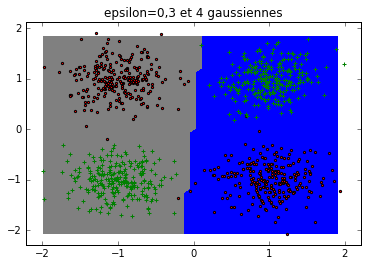

In [13]:
### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=1,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,3 et 4 gaussiennes")
plt.show()

Avec 4 gaussiennes, les données sont non séparables. Et les resultats sont ceux d'un classifieur classique (50%)

0 [ 0.0864258]
100 [ 0.04282863]
200 [ 0.03581182]
300 [ 0.03396712]
400 [ 0.03212457]
500 [ 0.03107365]
600 [ 0.03104368]
700 [ 0.03097318]
800 [ 0.0310303]
900 [ 0.03099032]
0.511


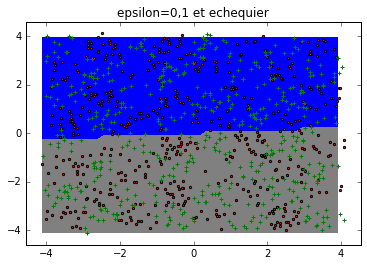

In [15]:

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=2,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et echequier")
plt.show()

Données inséparables avec l'echequier


1. Experimentez sur les différentes données et pour différents niveaux de bruit `eps` et différents pas d'apprentissage. 

2. Que représente l'erreur du hinge d'un point de vue géométrique ? et le vecteur de poids $w$ ?

3. Essayez d'apprendre des gaussiennes non centrées. La performance est-elle bonne ? Dans le cas négatif, avez-vous pensez à implémenter le biais (le poids $w_0$) ? que représente ce biais ?

4. Implémentez la version stochastique du perceptron : à chaque mise-à-jour, un exemple est tiré au hasard et la correction n'est effectuée que par rapport à cet exemple. Testez dans le cas bruité. Que remarquez vous sur le nombre de mise-à-jour à effectuer ?

## Données USPS (chiffres manuscrits)

Expérimentez votre perceptron sur des données de [chiffres manuscrits à télécharger](http://webia.lip6.fr/~mapsi/uploads/Cours/2015_tme3_usps_train.txt). Chaque exemple correspond à un chiffre manuscrit sur une matrice 16x16 (description sur un vecteur de taille 256), où chaque valeur indique la luminosité du pixel. 
Utilisez les fonctions suivantes pour lire les données et affichez un chiffre.
Expérimentez d'abord les performances sur 1 classe contre 1 classe (par exemple les 6 contre les 9), puis tenter de séparer une classe de plusieurs autres classes. Que remarquez vous sur les performances ? Quelle performance ferait un classifieur aléatoire ?

Le vecteur poids obtenu apres apprentissage peut dans le cas de ces données être interprétré : que signifie une valeur positive/négative  du poids associé à un pixel ? Visualisez comme pour les images le vecteur (transformé en matrice) de poids. Reconnaissez vous des motifs ?

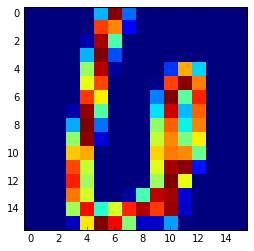

In [43]:
def  load_usps(filename):
    with open(filename ,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)
datax,y = load_usps("usps.txt")
plt.imshow(datax[5].reshape((16,16)),interpolation="nearest")

In [44]:
perc = Perceptron(eps=1e-1,max_iter=1000)

def chooseclasses(i, j, y, datax):
    index = (y==i)+(y==j)
    yy = y[index]
    df = datax[index]
    return(df,yy)

df,yy = chooseclasses(0,5,y,datax)

perc.fit(df,yy)
perc.score(df,yy)

0 [ 0.]
100 [ 0.]
200 [ 0.]
300 [ 0.]
400 [ 0.]
500 [ 0.]
600 [ 0.]
700 [ 0.]
800 [ 0.]
900 [ 0.]


0.31771428571428573

In [51]:
print(yy[0],yy[10])
print(perc.predict(df[0]))
print(perc.predict(df[10]))

5 0
[[ 1.]]
[[ 1.]]


In [52]:
df,yy = chooseclasses(1,2,y,datax)
perc2 = Perceptron(eps= 0.0001)
perc2.fit(df,yy)
print(perc2.score(df,yy))

0 [ 0.]
100 [ 0.]
200 [ 0.]
300 [ 0.]
400 [ 0.]
500 [ 0.]
600 [ 0.]
700 [ 0.]
800 [ 0.]
900 [ 0.]
1.0


## Extensions : linéaire... vraiment ?

Nous avons pour l'instant considérer que des séparatrices linéaires. 

1. Pourquoi à votre avis est-il utile de limiter la famille de fonctions considérée (pensez aux k-plus proches voisins) ? En quoi est-ce limitant ?

Une façon d'augmenter l'expressivité des fonctions est de transformer l'espace d'entrée par des projections. Soit $x \in \mathbb{R}^2$, et $\phi(x)=(1,x_1,x_2,x_1x_2,x_1^2,x_2^2)$ la projection polynomiale d'ordre 2.
Quelle est la forme des frontières de décision de la fonction de décision $f^\phi_\mathbf{w}(\mathbf{x})=f_\mathbf{w}(\phi(\mathbf{x}))$ ? 

1. Que doit-on changer pour adapter la descente du gradient, que ce soit dans le cas de la régression linéaire ou du perceptron ? Peut-on généraliser à des degrés supérieurs ?

Implémentez une fonction `proj_poly2(data)` qui renvoie la projection polynomiale de degré 2 de la matrice d'exemples.
Utilisez cette fonction pour apprendre un perecptron avec une projection polynomiale (soit en modifiant la classe, soit en prétraitant les données).

Testez sur les données de type 2. 


Soit $B=\{x^1,x^2,\cdots,x^B\}$ un ensemble de points de même dimension que l'entrée, et $\phi_B(x)=(k(x,x^1),k(x,x^2),\cdots,k(x,x^B))$ la projection gaussienne sur $B$ de $x$, $k(x,x')=Ke^{\frac{\|x-x'\|^2}{\sigma^2}}$.

1. Que doit-on changer pour adapter l'algorithme du perceptron ?  Implémentez.

2. Que veut-dire un poids positif devant une composante  de cette projection ? un poids négatif  ? un poids nul ? 
3. Que se passe-t-il si beaucoup de poids sont non nuls ? nuls ? Dans quel cas la frontière est la plus complexe ? la moins ?
4. En vous inspirant de la notion de ridge regression vu en cours, que proposez vous pour régulariser ?
